## Pair Programming - Regresión lineal 4

### Covarianza y Correlación

---

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import random 

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Medida gráficos
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("../archivos/metro_A.csv", index_col=0)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.


1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?


La covarianza indica si la dirección de las variables varían en la misma dirección, que puede ser positiva o negativa.

La correlación mide la fuerza con la las variabales a comparar están relacionadas. Los resultados máximos van de 1 a -1.  

___

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [3]:
df.cov()

,weekday,holiday_cat,temp_c,snow_1h,traffic_volume
weekday,4.024199,-2.305227e-03,-0.091615,-2.446409e-04,-5.960963e+02
holiday_cat,-0.002305,1.264325e-03,-0.003725,-2.816267e-07,-3.030853e+00
temp_c,-0.091615,-3.724739e-03,161.638754,-2.164556e-03,3.346521e+03
snow_1h,-0.000245,-2.816267e-07,-0.002165,6.673339e-05,1.195085e-02
traffic_volume,-596.096265,-3.030853e+00,3346.521299,1.195085e-02,3.947988e+06


In [4]:
df.corr()

,weekday,holiday_cat,temp_c,snow_1h,traffic_volume
weekday,1.000000,-0.032318,-0.003592,-0.014929,-0.149551
holiday_cat,-0.032318,1.000000,-0.008239,-0.000970,-0.042899
temp_c,-0.003592,-0.008239,1.000000,-0.020841,0.132475
snow_1h,-0.014929,-0.000970,-0.020841,1.000000,0.000736
traffic_volume,-0.149551,-0.042899,0.132475,0.000736,1.000000


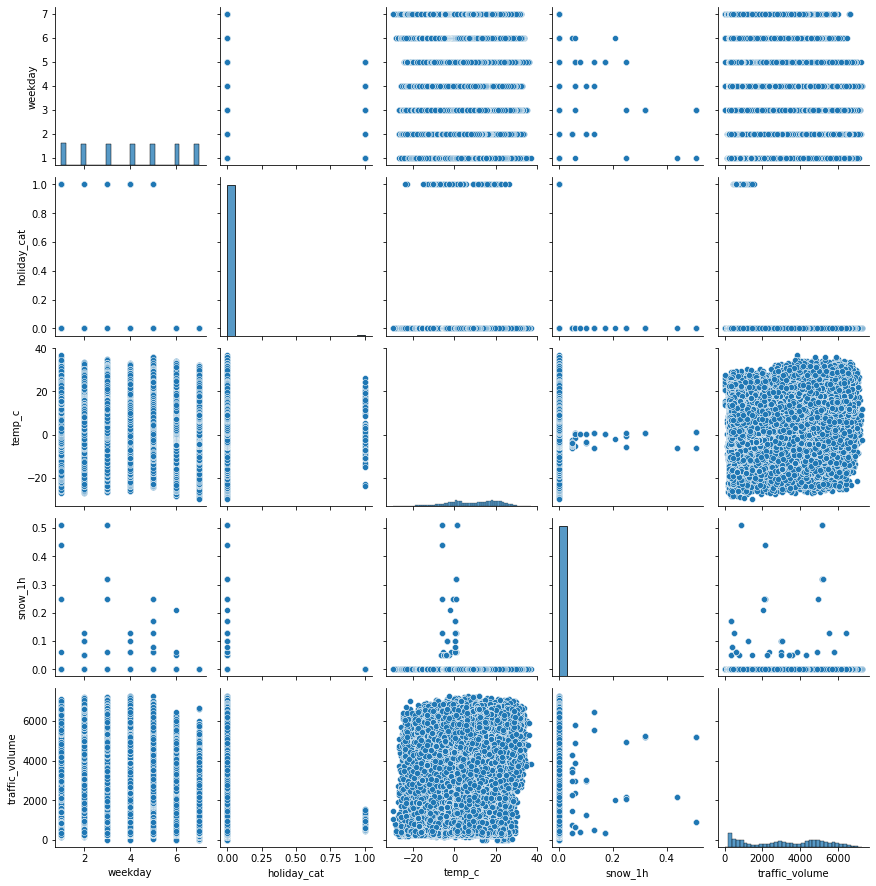

In [5]:
sns.pairplot(df)

Según los resultados vemos que en la covarianza de las variables predictoras es mayormente negativa. Observamos también que al mirar la correlación la fuerza con la que están relacionadas no es muy alta. 

Con el pairplot confirmamos que no hay patrones claros de correlación.

Como vemos que no hay una correlación lineal clara entre nuestras variables vamos a probar hacer la correlación de Spearman, para que nos de unos datos más precisos.

In [6]:
df.corr(method="spearman")

,weekday,holiday_cat,temp_c,snow_1h,traffic_volume
weekday,1.000000,-0.032388,-0.002929,-0.014860,-0.151353
holiday_cat,-0.032388,1.000000,-0.008101,-0.001288,-0.038013
temp_c,-0.002929,-0.008101,1.000000,-0.033357,0.132722
snow_1h,-0.014860,-0.001288,-0.033357,1.000000,-0.005187
traffic_volume,-0.151353,-0.038013,0.132722,-0.005187,1.000000


___

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.


In [7]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

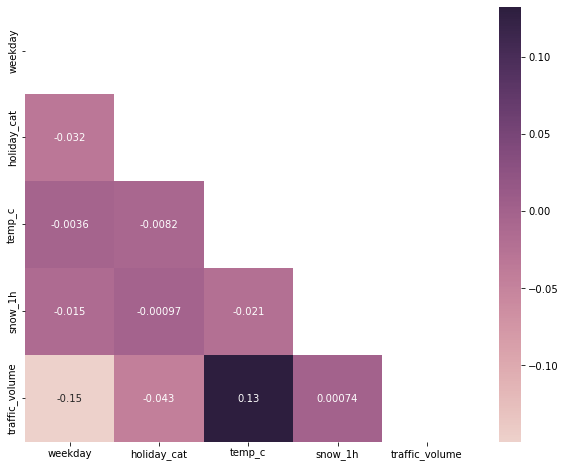

In [9]:
fig= sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), mask= mask, annot=True)
plt.savefig("../graficas/heatmap_df_metro_A.png");

___

4. Guardad la gráfica del heatmap.

In [13]:
#plt.savefig("../graficas/heatmap_df_metro.png")
#La hemos guardado arriba pero copiamos el código aquí, por orden visual.